## Defining the Question

### a) Specifying the Question

The research question is to identify factors that affect housing prices using the given information on real estate properties

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables


### b) Defining the Metric for Success

For this analysis to be considered successful, the following areas must be covered:
1. If we identify factors that affect housing prices.
2. If we predict accurately the price of a house.
3. If we get the best model to predict price of house.

### c) Understanding the context 

Hass Consulting Company which is a real estate leader with over 25 years of experience. HassConsult offers investment-grade developments all over the City.

The developments they offer have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

It has proven over the last decade to be an important tool providing investors, home owners, the financial industry and consumers with current and historical information about house price inflation- allowing them to make informed decisions in the housing market, in order to enjoy the best possible returns.

To improve the services and pricing services they have requested for our services for better pricing.

### d) Recording the Experimental Design

The following steps will be followed in conducting this study:
1.Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording our observations.
6. Performing regression analysis.
7. Incorporate categorical independent variables into our models.
8. Check for multicollinearity
9. Provide a recommendation based on our analysis. 
10. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
11. Challenge our solution by providing insights on how we can make improvements in model improvement.

### e) Data Relevance

The dataset to use for this project is found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)].  

Below is the dataset glossary:

Id 
price  - Price of the house
bedrooms - Number of Bedrooms
bathrooms - Number of Bathrooms
sqft_living - Square feet area of living area
sqft_lot  - Square feet area of parking Layout
floors - Number of Floors
waterfront - Whether waterfront is there or not
view - Number of Views
grade - Grades
sqft_above
sqft_basement - Square feet area off basement
yr_built - Year the house is built
yr_renovated - Year the house is renovated
zipcode - zipcode os the house
lat : Latitude of the house
lon : Longitude of the house
sqft_living15
sqft_lot15

## Reading the Data

### Importing our Libraries

In [1]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading our Dataset

In [2]:
# Loading the Dataset from the source i.e. csv

house_price = pd.read_csv('Independent Project Week 7 - house_data.csv')

### Previewing the Dataset 

In [3]:
# previewing the first five entries of the dataset

house_price.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# previewing the last five entries of the dataset

house_price.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Checking the Data

In [5]:
# From our profile report, we can see that we don't have any duplicated rows
# But let us check 
house_price.duplicated().sum()

3

> There are 3 duplicate rows, therefor we have to remove them from the dataset

In [6]:
# droping columns that are duplicated

house_price.drop_duplicates().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#selecting the relevant columns to work with.
house_price = house_price.drop({'id', 'lat', 'long'}, 1)
house_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


## Data Cleaning

In [8]:
# finding the shape of the dataframe
house_price.shape

(21613, 17)

In [9]:
# getting to know about the data

house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [10]:
# data description

house_price.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [11]:
house_price.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

> There are no null values

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [12]:
# finding the information about the variables
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [13]:
# checking for anormalities
Q1 = house_price.quantile(0.25)
Q3 = house_price.quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

Lower_Boundprice           -162625.000
bedrooms              1.500
bathrooms             0.625
sqft_living        -257.500
sqft_lot          -3432.000
floors               -0.500
waterfront            0.000
view                  0.000
condition             1.500
grade                 5.500
sqft_above         -340.000
sqft_basement      -840.000
yr_built           1882.000
yr_renovated          0.000
zipcode           97905.500
sqft_living15       185.000
sqft_lot15        -2374.500
dtype: float64
Upper_Boundprice            1129575.000
bedrooms               5.500
bathrooms              3.625
sqft_living         4234.500
sqft_lot           19160.000
floors                 3.500
waterfront             0.000
view                   0.000
condition              5.500
grade                  9.500
sqft_above          3740.000
sqft_basement       1400.000
yr_built            2066.000
yr_renovated           0.000
zipcode            98245.500
sqft_living15       3665.000
sqft_lot15         1755

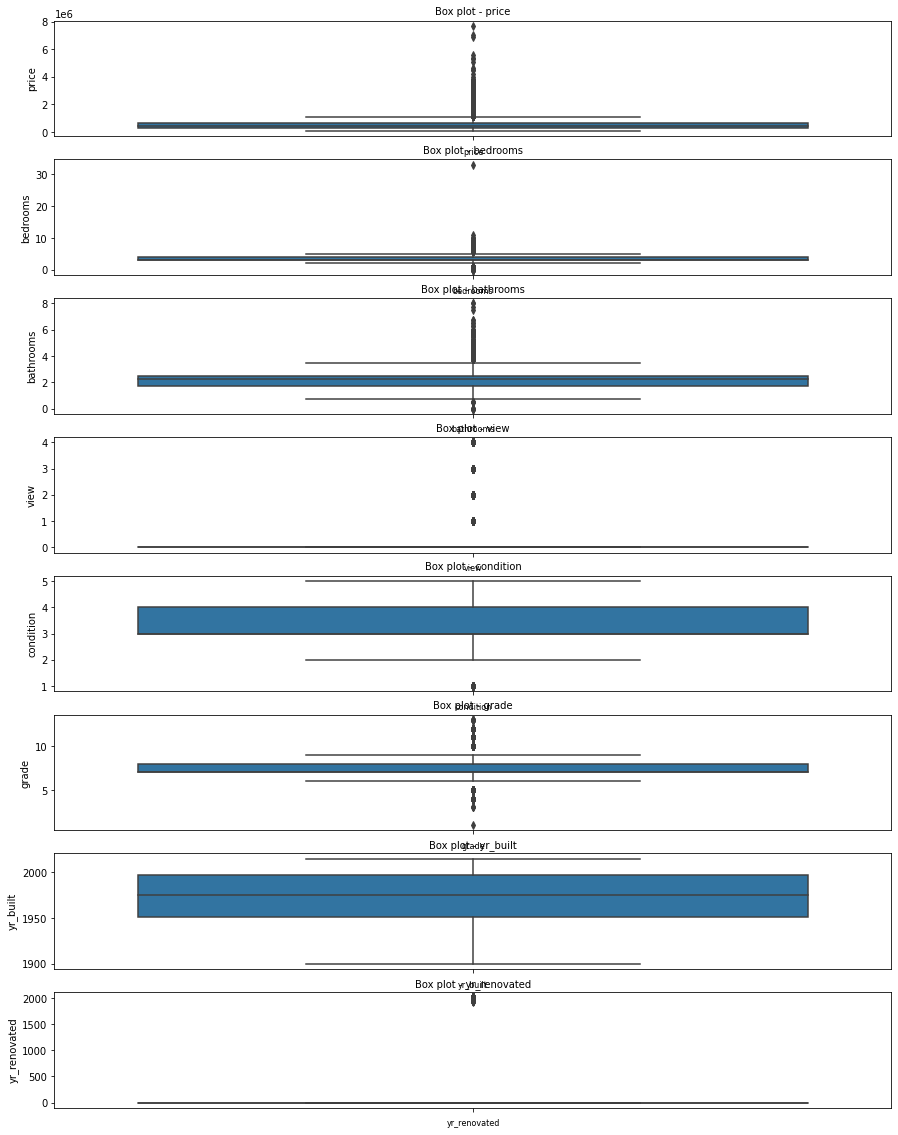

In [14]:
# checking for outliers
col_names = ['price',	'bedrooms',	'bathrooms', 'view',	'condition',	'grade',	
             	'yr_built',	'yr_renovated']

fig, ax = plt.subplots(len(col_names), figsize= (15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house_price[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

> Variables with outliers include; Price, Bedrooms, bathrooms, view, grade, year renovated. These is because houses cost highly, other houses have many bedrooms and bathrooms therefore seen as outliers.




> 

In [15]:
# Removing the outliers

house_price1 = house_price[~((house_price < (Q1 - 1.5 * IQR)) |(house_price > (Q3 + 1.5 * IQR))).any(axis=1)]
house_price1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819


In [16]:
# Getting the size of our data set after removing the outliers
house_price1.shape

# Afer removing the outliers we remain with 863 rows.

(15068, 17)

> since removing the outliers we shall lose over 6000 data set, we choose to work with the outliers.
> Removing the outliers we shall lose almost a quater of the dataset.

Text(0.5, 1.0, 'The number of bedroom per unit')

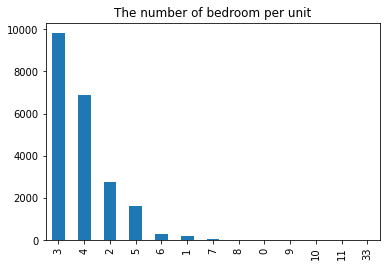

In [17]:
# Bar graph showing the number of bedrooms per unit.

house_price.bedrooms.value_counts().plot.bar()
plt.title('The number of bedroom per unit')
# most of the houses have 3 bedrooms.

> Most of the houses contain 3 bedrooms. Others that have relatevely high bedroom are of 4, 2 and 5 bedrooms. Houses with smaller number of bedroom are those with 6, 1 and 7 bedrooms. 

Text(0.5, 1.0, 'Grade of the House')

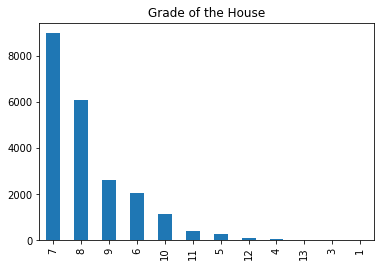

In [18]:
# Bar graph showing the level of the house.

house_price.grade.value_counts().plot.bar()
plt.title('Grade of the House')

> Most of the houses are of grade 7, followed by grade 8, 9, and 10 respectively.

> Least houses are of grades 11, 5, 12 and 4

Text(0.5, 1.0, 'Floor Size')

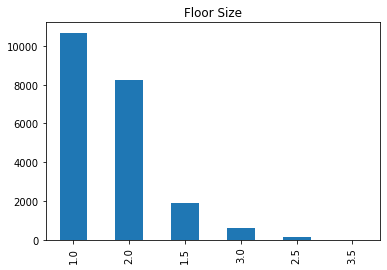

In [19]:
# Bar graph showing the floor of the house.

house_price.floors.value_counts().plot.bar()
plt.title('Floor Size')

> Most of the houses are of floor size 1.0, followed by 2.0, 1.5, 3.0 and 2.5 respectively.

Text(0.5, 1.0, 'Waterproof Yes/No')

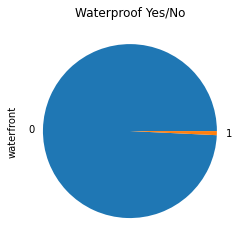

In [20]:
house_price.waterfront.value_counts().plot(kind = 'pie')
plt.title('Waterproof Yes/No')

> From our pie chart, over 98% of the houses are waterproof while only around only 2% are not waterproof 

Text(0.5, 1.0, 'The Year of House Construction')

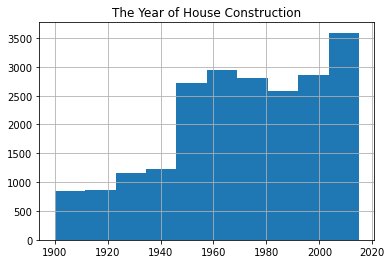

In [21]:
# histogram showing the year of the house construction

house_price['yr_built'].hist()
plt.title('The Year of House Construction')

> Our histogram is left skewed, most of the houses were built between the years of 1950 to around 2015.

### c) Summary Statistics

In [22]:
house_price.describe(include= 'all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


> Based on our summary statistics, the mean price of a house cost 5.401822e+05, most houses are of 3 bedrooms and 2 bathrooms. The sqft for living room are approximately 2080fts.

## Bivariate Analysis

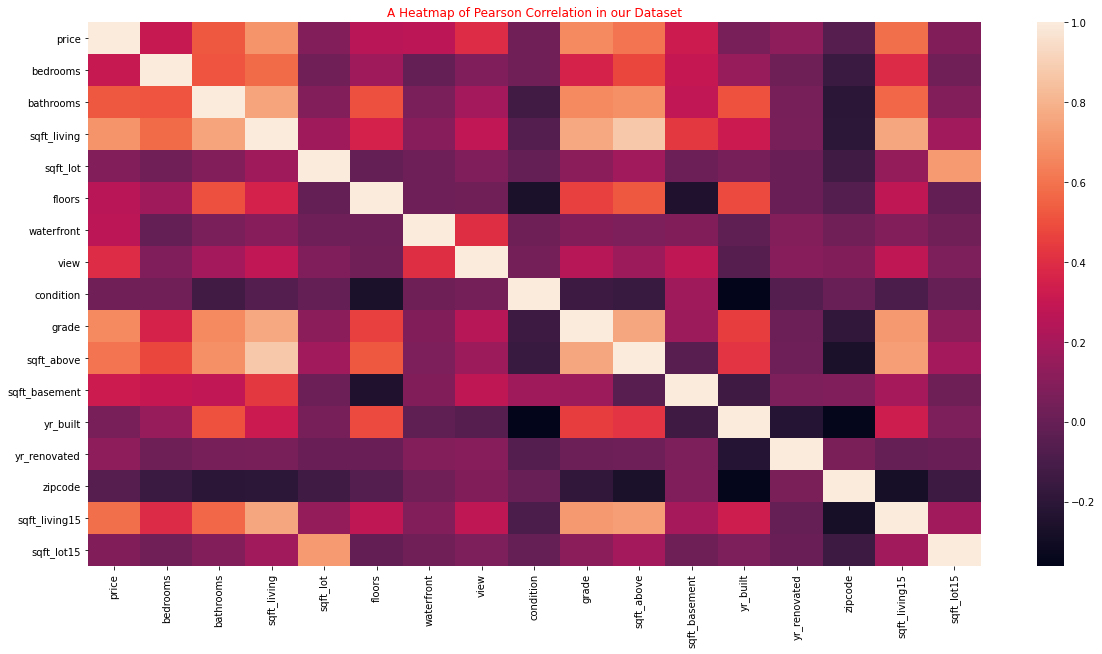

In [23]:
# Calculating the pearson coefficient correlation
plt.figure(figsize = (20,10))
sns.heatmap(house_price.corr(),annot=False)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

> From the piarson correlation, the atributes with high correlation were price and sqft living15, price and sqrft lot15.

In [24]:
# finding the skewness of our variables
house_price.skew()

# Most of our varaibles are positively skewed with only year of built negatively skewed.

price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [25]:
# finding the kurtosis
house_price.kurt()

# most of our variables have positive kurtosis

price             34.522444
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
waterfront       127.632494
view              10.893022
condition          0.525764
grade              1.190932
sqft_above         3.402304
sqft_basement      2.715574
yr_built          -0.657408
yr_renovated      18.701152
zipcode           -0.853479
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

## Multivariate Analysis

### Principal Component Analysis

In [142]:
# working for principal component analysis
# defining our function.

house_price_pca = house_price.copy(deep=True)

In [143]:
# defining our x and y by sellecting columns
x = house_price_pca.drop(['price'], axis= 1) # features
y = house_price_pca['price'] #target variable

# Splitting the data into train and test sets

from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [144]:
# Performing standard scalar normalization to normalize our feature set.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [145]:
# Applying PCA
# We did not specify the number of components in the constructor. 
# Hence, the features in Financial_encoding set will be returned for both the training and test sets.

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [146]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.16970360e-01, 1.25211337e-01, 1.08122875e-01, 8.33301252e-02,
       6.56895365e-02, 5.60910049e-02, 5.22830640e-02, 4.26392467e-02,
       3.73992167e-02, 3.11855253e-02, 2.08035772e-02, 1.69761404e-02,
       1.60528589e-02, 1.47180849e-02, 1.25270476e-02, 2.61636716e-33])

## Implementing the solution

##### Checking for multicolinearity

In [147]:
# finding the correlations between the variables

corr = house_price[['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',
                    'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'sqft_living15',	'sqft_lot15']].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.713202,0.119248


> There is a strong correlation between price and sqrf living, bathroom and living sqrf, price and grade, sqft living  and grade, sqft living and sqft above, sqft above and grade. These factors contribute more to the price of the house. There is a relative positive correlation price and sqft living15, bathroom and year built, grade and bathroom. There is weak positive correlation between price and bathroom, price and sq lot, condition and price, bedroom and floor. There is weak negative correlation between price and zipcode, bedroom and waterfront, condition and floors, condition and sqft lot and condition.

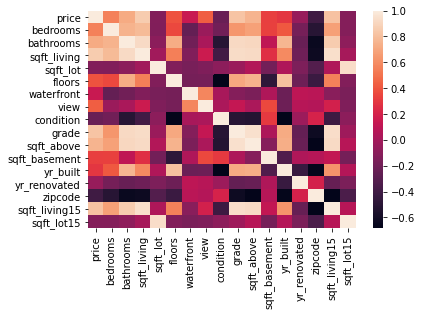

In [148]:
# Checking for independence between features¶
# 
sns.heatmap(corr.corr())  

# Regression

## Multiple Linear Regression

In [149]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# finding the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_house_price = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_house_price

,Coefficient
bedrooms,-35597.885251
bathrooms,33943.548837
sqft_living,78079.388685
sqft_lot,1156.643624
floors,15429.629563
waterfront,54123.860280
view,33337.306612
condition,12832.334546
grade,138356.950813
sqft_above,66460.846999


> All the variables contribute positively to the our y predictor except, sqft lot15, year when the house was built and bedrooms. Whenever we increase these variables they reduce the price of the house. The year the house was built has the highest nnegative effect to the price of the house. The older the house the lower the price. The grade of the house, sqft loving15, sqft above, waterfront, view.

In [151]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(x_test)

# To compare the actual output values for X_test with the predicted values
# 
house_price = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
house_price

,Actual,Predicted
17384,297000.0,2.927847e+05
722,1580000.0,1.495014e+06
2680,562100.0,5.059952e+05
18754,631500.0,5.630654e+05
14554,780000.0,8.519750e+05
...,...,...
5427,844000.0,9.392666e+05
16547,335500.0,2.862744e+05
4585,369950.0,2.888997e+05
17762,300000.0,2.306172e+05


> There is a closer relationship between the actual and predicted value.

In [152]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 135954.72612100662
Mean Squared Error: 42222885491.379036
Root Mean Squared Error: 205482.0807062724


##### Setting our linear regression as our baseline

In [153]:
# Creating our linear regression model for the purpose of comparison
# 
from sklearn.metrics import mean_squared_error
regression=LinearRegression()
regression.fit(x,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

46722005847.31689


> Our linear regression mean squire error is 46722005847.31689, which will be our baseline to compare with other models to determine the best.

In [154]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 45764.913908867326,
 'bedrooms': -39363.79357638453,
 'condition': 19459.180084506716,
 'floors': 27029.54719977978,
 'grade': 119860.09435179096,
 'sqft_above': 51.49414086195793,
 'sqft_basement': 57.867109564138445,
 'sqft_living': 109.36125070964226,
 'sqft_living15': 24.725000960362195,
 'sqft_lot': -0.00227899121819064,
 'sqft_lot15': -0.5510105315152032,
 'view': 43351.17650044986,
 'waterfront': 579086.615032849,
 'yr_built': -3577.7739448109696,
 'yr_renovated': 10.11967440334206,
 'zipcode': -6.7722292391697465}

> The squire lot coefficient has been reduced approaching 0.

### Quantile Regression

In [183]:
# We will use the python package statsmodels for Quantile Regression
# defining our x and y by sellecting columns
# Get the 2 and the last column from the dataset 
x1 = house_price.iloc[:, 1:17].values
y1 = house_price.iloc[:, 0].values
print(x1)
print(y1)

# we use the iloc function for the quantile function. 
# we set price as our y-axis and the rest to independent variable.

[[ 292784.66877881]
 [1495013.6966968 ]
 [ 505995.19937262]
 ...
 [ 288899.71885388]
 [ 230617.1672604 ]
 [ 377236.12348224]]
[ 297000. 1580000.  562100. ...  369950.  300000.  575950.]


In [184]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))

Mean squared error: 46722005847.32
Variance score: 0.65


> Our quantile regression mean squared error 46722005847.32 which is no different with the linear regression, thus our baseline model is equal to the quantile regression.

In [189]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.25 quantile
#
mod = smf.quantreg('y1 ~ x1', house_price)
res = mod.fit(q=.25)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y1   Pseudo R-squared:               0.3018
Model:                       QuantReg   Bandwidth:                   3.602e+04
Method:                 Least Squares   Sparsity:                    4.138e+05
Date:                Fri, 19 Feb 2021   No. Observations:                 4323
Time:                        11:00:45   Df Residuals:                     4321
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.769e+04   4812.271      3.676      0.000    8256.994    2.71e+04
x1             0.7163      0.008     91.651      0.000       0.701       0.732

The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


> Our r-squired at 0.25 quantile is 30% which is not either good for our prediction.

In [185]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y1 ~ x1', house_price)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y1   Pseudo R-squared:               0.3972
Model:                       QuantReg   Bandwidth:                   4.131e+04
Method:                 Least Squares   Sparsity:                    3.416e+05
Date:                Fri, 19 Feb 2021   No. Observations:                 4323
Time:                        10:57:00   Df Residuals:                     4321
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.117e+04   5463.160     13.026      0.000    6.05e+04    8.19e+04
x1             0.8201      0.009     91.236      0.000       0.802       0.838

The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


> At the 0.5 quantile, we have 39% prediction rate.

In [186]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.75 quantile
#
mod = smf.quantreg('y1 ~ x1', house_price)
res = mod.fit(q=.75)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y1   Pseudo R-squared:               0.4697
Model:                       QuantReg   Bandwidth:                   3.708e+04
Method:                 Least Squares   Sparsity:                    4.402e+05
Date:                Fri, 19 Feb 2021   No. Observations:                 4323
Time:                        10:57:16   Df Residuals:                     4321
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.085e+05   6872.281     15.785      0.000     9.5e+04    1.22e+05
x1             0.9486      0.012     81.379      0.000       0.926       0.971

The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


At the 0.75 quantile the r-squared of 46% which is not good for our prediction.

### Ridge Regression

In [62]:
# when working with ridge regression we need to determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# we use the gride search method and setting our log space -5 to 5 getting 10 values within the range
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,5,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [63]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 0.021544346900318846}
47397278261.44984


> For our ridge regression, the mean squire error is 47397278261.44 and our lineer regression 46722005847.32, the ridge regression mean squire error is performing poorly. The ridge regression is not performing better for our prediction compared to linear.

In [64]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.1)
ridge.fit(x,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(second_model)

47248858637.63646


> The model is quit low.

In [75]:
# determining the coefficients of the ridge regression for comparison

# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house_price_pca.drop(['price'], axis= 1).columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 45764.913908867326,
 'bedrooms': -39363.79357638453,
 'condition': 19459.180084506716,
 'floors': 27029.54719977978,
 'grade': 119860.09435179096,
 'sqft_above': 51.49414086195793,
 'sqft_basement': 57.867109564138445,
 'sqft_living': 109.36125070964226,
 'sqft_living15': 24.725000960362195,
 'sqft_lot': -0.00227899121819064,
 'sqft_lot15': -0.5510105315152032,
 'view': 43351.17650044986,
 'waterfront': 579086.615032849,
 'yr_built': -3577.7739448109696,
 'yr_renovated': 10.11967440334206,
 'zipcode': -6.7722292391697465}

> For sqft lot is reduced approaching 0.

### Lasso Regression

In [87]:
# Scaling our data 
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [88]:
# Creating lasso object
# 
from sklearn import linear_model

from sklearn.linear_model import Lasso
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6537796708652712
lasso MSE: 46722005880.94857
lasso coef: [-3.66086135e+04  3.52389189e+04  2.70464954e+05 -9.32130157e+01
  1.45948308e+04  5.00990707e+04  3.32199873e+04  1.26616682e+04
  1.40889053e+05 -1.10651849e+05 -5.63172240e+04 -1.05086006e+05
  4.06418435e+03 -3.60986927e+02  1.69405260e+04 -1.50444466e+04]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 41654548703471.5, tolerance: 291664766083.6765



> For our lasso regression the mean squire error is 46722005880.94 and our baseline linear regression is 46722005847.31, which is almost simillar to therefore lassor regression is not performing better compaired to the baseline.

### Elastict Net Model

In [94]:
# This argument  is set inside the ElasticNet function. 
# creating our grid.
# 
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [95]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(x,y)
search.best_params_
abs(search.best_score_)

47439284870.24662

> Our elastic mean squire error is 47439284870.24,  compaired to our baseline linear regression of 46722005847.31, which is more worse. there linear regression is quite ideal compaired to elastic regression.

In [96]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 8989.32. This is above our baseline model of MSE 6021.32  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

82486832228.60619


In [99]:
# finding the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,house_price_pca.drop(['price'], axis= 1)):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# most of the variables affect our price of house negatively

{'bathrooms': 17784.13247646619,
 'bedrooms': 8440.75204768162,
 'condition': 3734.544414255911,
 'floors': 7864.607500060038,
 'grade': 26374.26791734371,
 'sqft_above': 22153.625369785623,
 'sqft_basement': 13557.787157438986,
 'sqft_living': 26507.490752543035,
 'sqft_living15': 21405.15869750312,
 'sqft_lot': 2171.5399778824485,
 'sqft_lot15': 1450.8648457830657,
 'view': 16830.34932743985,
 'waterfront': 12416.007496155056,
 'yr_built': -3935.680355717651,
 'yr_renovated': 6002.966715914349,
 'zipcode': 575.0744309896346}

> Our sqft lot which had been low is quite high, elastict regression does not reduce the variable to zero.

### checking heteroscedasticity using Bartlett’s test

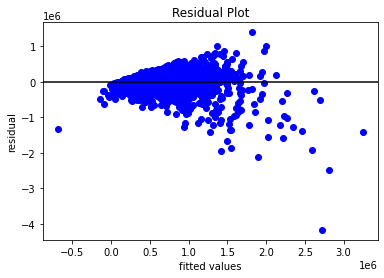

In [107]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [108]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


> since our test results is greater than critical values, our variances are homogeneous.

### Challenging the solution

In [117]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6664366713409504
linear score: 0.6664403879900951
lasso MSE: 47354942610.44673
linear MSE: 47354414969.39082
lasso best estimator coef: [ -37775.03424168   30402.05036728  216673.9437237      768.75501725
   16678.6315219    47510.68616937   32440.88183432   14571.04623878
  141402.26278277  -61331.15358806  -30451.11252017 -104311.10134078
    3749.59356599    -690.51946719   18029.09999757  -14873.81976931]
linear coef: [ -37805.93467122   30560.80729499   76416.02609297     838.2364492
   16692.49076155   47528.02578483   32438.29360688   14594.86642459
  141360.12294735   64958.54303363   37037.8321535  -104379.38774064
    3763.81989303    -720.25645328   18162.98764459  -14944.66801079]


> Based on our prediction;

* linear regression mean squire error 46722005847.31
* Quantile regression mean squire error or r2 is 46% to carry out regression
* ridge regression mean squire error 47397278261.44
* lasso regression mean squire error 46722005880.94857
* Elastic regression mean squire error 47439284870.24662

Based on these linear regression is best fitted for these prediction and also lasso regression which is 66% effective.

## Conclusion

> The model performed were well exercuted, there were dificulties in perfomance of quantile regression hence we managed to use the iloc function to perfom the model.

> based on our analysis the models were not effective for carrying out the price of the house. Therefore our data was not really good to carry out the prediction. 

## Recomendation

> Therefore its relevant to reduce our independent variables and focus on the most relevant ones.

## Follow up Questions

### a). Did we have the right data?

> Yes, but the its ideal to focus on the most relevant independent variables to make our prediction most effective.

### b). Do we need other data to answer our question?

> We have enough dataset for the analysis

### c). Did we have the right question?

> Yes, but challenging to answer the questions